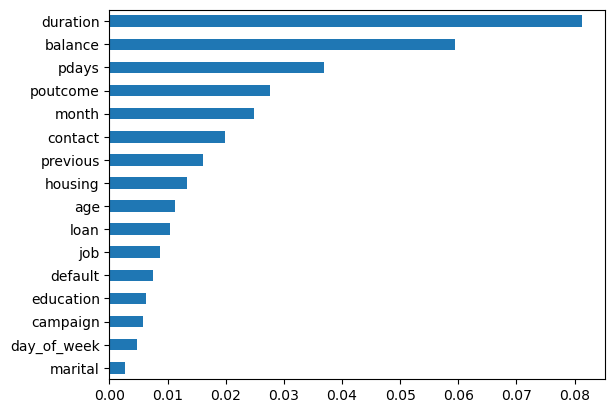

In [2]:
# project_copy is a focused snapshot of the full project code at the moment of this file's creation. 
# It contains cleaning and preprocessing steps to get our data model-ready
%run project_preprocessing.ipynb ;

# We are going to be testing support vector machine model only on one dataset due to its computational cost
# ndf_woe - Data that underwent Weight of Evidence transformation and was normalized

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ndf_woe.drop(['duration'], axis = 1), 
                                                    df['y'], test_size=0.30)

param_grid = {'C': [0.1, 10, 1000], 'gamma': [1,0.01,0.0001], 'kernel': ['rbf'], 'class_weight': ['balanced']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, cv = 3)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))